## Hand Written Digit Classification Model (Using Neural Networks|)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [9]:
fashion_mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

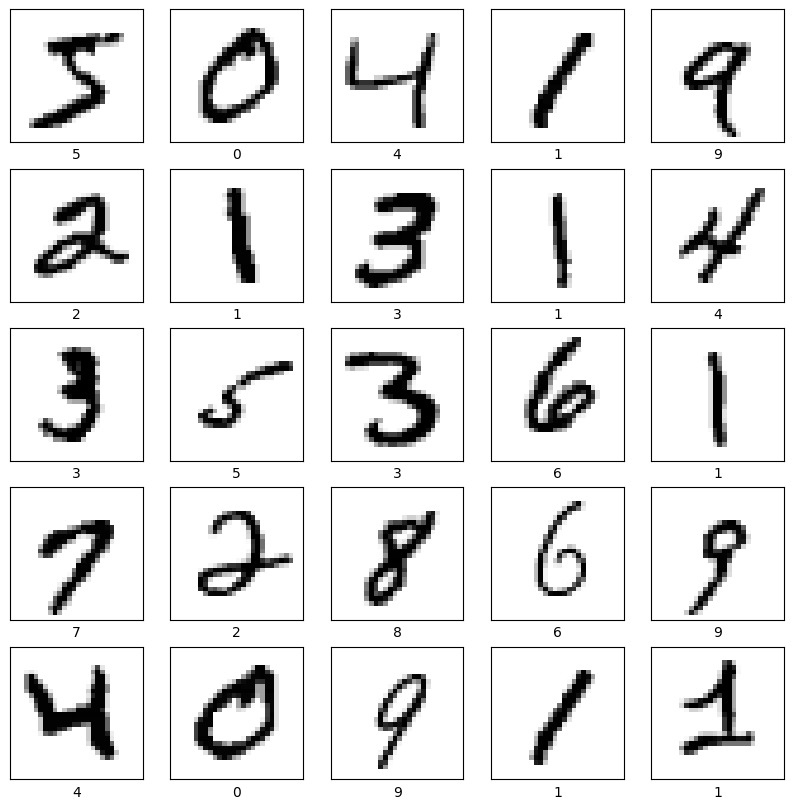

In [12]:
# Plotting Sample images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## Building Model

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

/home/bittu/Desktop/MachineLearning/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20


2024-07-31 13:57:26.508737: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2024-07-31 13:57:26.696810: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
I0000 00:00:1722414447.174147   12939 service.cc:146] XLA service 0x7ebd4800b9f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1722414447.174178   12939 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-07-31 13:57:27.199606: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-31 13:57:27.273967: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8902


 242/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - accuracy: 0.7070 - loss: 1.0162

I0000 00:00:1722414447.850967   12939 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 605us/step - accuracy: 0.8706 - loss: 0.4537
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step - accuracy: 0.9634 - loss: 0.1245
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 619us/step - accuracy: 0.9749 - loss: 0.0826
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - accuracy: 0.9818 - loss: 0.0600
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - accuracy: 0.9864 - loss: 0.0457
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 612us/step - accuracy: 0.9898 - loss: 0.0349
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - accuracy: 0.9911 - loss: 0.0282
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 609us/step - accuracy: 0.9945 - loss: 0.0205
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 634us/step - accuracy: 0.9956 - loss: 0.0163
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step - accuracy: 0.9959 - loss: 0.0138
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step - accuracy: 0.9968 - loss: 0.0111
Epoch 12/20
1875/18

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

2024-07-31 13:57:51.254577: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.
2024-07-31 13:57:51.288185: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 - 1s - 2ms/step - accuracy: 0.9787 - loss: 0.1103

Test accuracy: 0.9786999821662903


In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

193/313 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step

2024-07-31 13:57:52.023057: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step


In [24]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [25]:
predictions[0]

array([8.6318387e-13, 1.5445424e-13, 1.6935760e-11, 4.1608441e-08,
       2.7886547e-21, 1.1391430e-14, 1.5981953e-24, 1.0000000e+00,
       9.9134416e-12, 2.9085669e-09], dtype=float32)

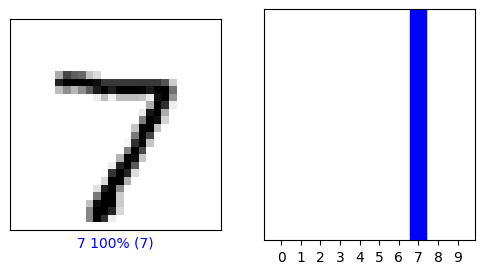

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

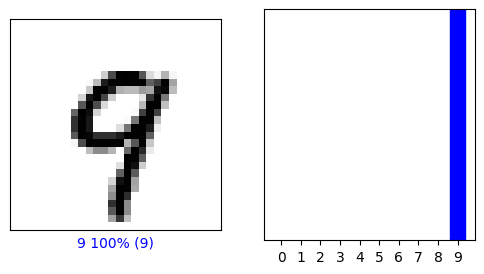

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()